In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config

In [2]:
input_taz_shapefile_folder = _config.input_taz_shapefile_folder
taz_shapefile              = _config.taz_shapefile
se_years                   = _config.se_years
input_model_se_folder      = _config.input_model_se_folder
se_base_year               = _config.se_base_year
df_centers                 = _config.df_centers
df_projects                = _config.df_projects
hh_factor                  = _config.hh_factor

# Read in data from previous notebooks

,N,project_id,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,geometry
0,62317,134,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4..."
1,62317,134,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4..."
2,62317,134,Crossroads,City Center,2504,146.410140,49,82.317025,0.020341,"POLYGON ((422640.942 4469115.927, 422641.047 4..."
3,62317,134,Crossroads,City Center,2505,76.823967,49,167718.011467,41.444023,"POLYGON ((422654.105 4469147.185, 422649.306 4..."
4,62317,134,Crossroads,City Center,2498,112.631810,49,268457.440292,66.337278,"POLYGON ((421588.154 4469911.650, 421669.151 4..."
...,...,...,...,...,...,...,...,...,...,...
1242,24228,64,Meadowbrook Station,City Center,1492,45.728115,35,149005.282516,36.820007,"POLYGON ((424235.616 4505014.079, 424269.116 4..."
1243,24228,64,Meadowbrook Station,City Center,1493,50.633831,35,109626.735660,27.089356,"MULTIPOLYGON (((424462.516 4504848.479, 424705..."
1244,24256,64,Meadowbrook Station,City Center,1494,50.381448,35,108708.827297,26.862536,"POLYGON ((424715.708 4504846.582, 424945.987 4..."
1245,24281,64,Meadowbrook Station,City Center,1495,88.369280,35,93800.997173,23.178731,"POLYGON ((424961.771 4504845.920, 424963.041 4..."


<AxesSubplot:>

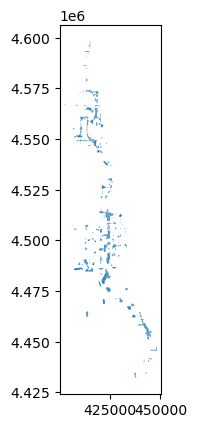

In [53]:
centers_taz_with_nearest_stop_gdf = gpd.read_file("intermediate/centers-taz-with-nearest-stop.geojson")
display(centers_taz_with_nearest_stop_gdf)
centers_taz_with_nearest_stop_gdf.plot()

In [74]:
centers_taz_with_nearest_stop_gdf['CO_FIPS'].unique()

array([49, 11, 35, 57,  3], dtype=int64)

In [54]:
# read proportions from REMM data
df_percent_changeable = pd.read_csv('intermediate/percent-changeable.csv')
display(df_percent_changeable)
df_area_ratio_of_taz = pd.read_csv('intermediate/parameter-area-ratio-of-taz.csv')
display(df_area_ratio_of_taz)

,N,project_id,TAZID,pctu_ch
0,10008,20.0,2117.0,0.865214
1,10010,20.0,1918.0,0.998802
2,10010,20.0,1973.0,0.874835
3,10016,16.0,1633.0,0.751144
4,10019,16.0,1024.0,0.090667
...,...,...,...,...
1128,69716,14.0,2632.0,1.000000
1129,71081,5.0,3352.0,0.717041
1130,71081,5.0,3353.0,1.000000
1131,71081,5.0,3364.0,0.309792


,TAZID,N,project_id,TOTEMP,TOTHH
0,170.0,-1.0,-1.0,0.966936,0.984915
1,170.0,15189.0,130.0,0.033064,0.015085
2,171.0,-1.0,-1.0,0.000000,0.991447
3,171.0,15189.0,130.0,1.000000,0.008553
4,174.0,-1.0,-1.0,0.187340,0.936162
...,...,...,...,...,...
2039,3405.0,65624.0,5.0,0.000000,0.094746
2040,3406.0,-1.0,-1.0,0.000000,0.831370
2041,3406.0,65631.0,5.0,0.000000,0.168630
2042,3407.0,-1.0,-1.0,1.000000,0.982759


In [56]:
# join tables
centers_taz_with_nearest_stop_gdf_changeable = pd.merge(centers_taz_with_nearest_stop_gdf, df_percent_changeable, on=['N','project_id','TAZID'], how='left')
centers_taz_with_nearest_stop_gdf_changeable_ratios = pd.merge(centers_taz_with_nearest_stop_gdf_changeable, df_area_ratio_of_taz, on=['N','project_id','TAZID'], how='left')
centers_taz_with_nearest_stop_gdf_changeable_ratios.fillna(0, inplace=True)
centers_taz_with_nearest_stop_gdf_changeable_ratios = centers_taz_with_nearest_stop_gdf_changeable_ratios.melt(id_vars=['N','project_id','AreaName','AreaType','TAZID','TAZACRES','CO_FIPS','sqm','acres','geometry','pctu_ch'],var_name='parameter',value_name='taz_ratio')
centers_taz_with_nearest_stop_gdf_changeable_ratios

,N,project_id,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,geometry,pctu_ch,parameter,taz_ratio
0,62317,134,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",0.869309,TOTEMP,0.786296
1,62317,134,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4...",1.000000,TOTEMP,0.519737
2,62317,134,Crossroads,City Center,2504,146.410140,49,82.317025,0.020341,"POLYGON ((422640.942 4469115.927, 422641.047 4...",1.000000,TOTEMP,0.001060
3,62317,134,Crossroads,City Center,2505,76.823967,49,167718.011467,41.444023,"POLYGON ((422654.105 4469147.185, 422649.306 4...",1.000000,TOTEMP,0.995679
4,62317,134,Crossroads,City Center,2498,112.631810,49,268457.440292,66.337278,"POLYGON ((421588.154 4469911.650, 421669.151 4...",0.533183,TOTEMP,0.789992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,24228,64,Meadowbrook Station,City Center,1492,45.728115,35,149005.282516,36.820007,"POLYGON ((424235.616 4505014.079, 424269.116 4...",0.196032,TOTHH,1.000000
2490,24228,64,Meadowbrook Station,City Center,1493,50.633831,35,109626.735660,27.089356,"MULTIPOLYGON (((424462.516 4504848.479, 424705...",0.403233,TOTHH,1.000000
2491,24256,64,Meadowbrook Station,City Center,1494,50.381448,35,108708.827297,26.862536,"POLYGON ((424715.708 4504846.582, 424945.987 4...",0.867869,TOTHH,1.000000
2492,24281,64,Meadowbrook Station,City Center,1495,88.369280,35,93800.997173,23.178731,"POLYGON ((424961.771 4504845.920, 424963.041 4...",0.980478,TOTHH,0.357651


In [75]:
centers_taz_with_nearest_stop_gdf_changeable_ratios['CO_FIPS'].unique()

array([49, 11, 35, 57,  3], dtype=int64)

# Prep socioeconomic data

In [78]:
# get SE data
df_se_data = pd.DataFrame()

for se_year in se_years:
    file = "SE_" + str(se_year) + '.csv'
    se_file = os.path.join(input_model_se_folder, file)

    _dbf = pd.read_csv(se_file)

    # Identify non-numeric columns
    non_numeric_columns = _dbf.select_dtypes(include=[int, float]).columns.tolist()
    non_numeric_columns.remove(';TAZID')  # Keep 'TAZID' as identifier variable

    _df_pivot = _dbf.melt(id_vars=[';TAZID','CO_FIPS'], value_vars=non_numeric_columns)

    _df_pivot['se_year'] = se_year

    if se_year==se_base_year:
        df_se_data_base = _df_pivot
    else:
        df_se_data = pd.concat([df_se_data,_df_pivot])

df_se_data_base.columns = df_se_data_base.columns + '_B'
df_se_data.columns = df_se_data.columns + '_F'

df_se_data_base.rename(columns={';TAZID_B':'TAZID','CO_FIPS_B':'CO_FIPS','variable_B':'parameter'}, inplace=True)
df_se_data.rename(columns={';TAZID_F':'TAZID','CO_FIPS_F':'CO_FIPS','variable_F':'parameter'}, inplace=True)

display(df_se_data_base)
display(df_se_data)

,TAZID,CO_FIPS,parameter,value_B,se_year_B
0,1,3,CO_TAZID,30001.0,2023
1,2,3,CO_TAZID,30002.0,2023
2,3,3,CO_TAZID,30003.0,2023
3,4,3,CO_TAZID,30004.0,2023
4,5,3,CO_TAZID,30005.0,2023
...,...,...,...,...,...
88645,3542,49,Enrol_High,0.0,2023
88646,3543,49,Enrol_High,0.0,2023
88647,3544,49,Enrol_High,0.0,2023
88648,3545,49,Enrol_High,0.0,2023


,TAZID,CO_FIPS,parameter,value_F,se_year_F
0,1,3,CO_TAZID,30001.0,2032
1,2,3,CO_TAZID,30002.0,2032
2,3,3,CO_TAZID,30003.0,2032
3,4,3,CO_TAZID,30004.0,2032
4,5,3,CO_TAZID,30005.0,2032
...,...,...,...,...,...
88645,3542,49,Enrol_High,0.0,2050
88646,3543,49,Enrol_High,0.0,2050
88647,3544,49,Enrol_High,0.0,2050
88648,3545,49,Enrol_High,0.0,2050


In [79]:
df_se_growth = pd.merge(df_se_data, df_se_data_base, on=['TAZID','CO_FIPS','parameter'])
df_se_growth['growth'] = df_se_growth['value_F'] - df_se_growth['value_B']
df_se_growth_hhemp = df_se_growth[df_se_growth['parameter'].isin(['TOTHH','TOTEMP'])]
df_se_growth_hhemp

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth
10638,1,3,TOTHH,0.0,2032,0.0,2023,0.0
10639,1,3,TOTHH,0.0,2042,0.0,2023,0.0
10640,1,3,TOTHH,0.0,2050,0.0,2023,0.0
10641,2,3,TOTHH,17.4,2032,13.0,2023,4.4
10642,2,3,TOTHH,29.8,2042,13.0,2023,16.8
...,...,...,...,...,...,...,...,...
53185,3545,49,TOTEMP,0.0,2042,0.0,2023,0.0
53186,3545,49,TOTEMP,0.0,2050,0.0,2023,0.0
53187,3546,49,TOTEMP,0.0,2032,0.0,2023,0.0
53188,3546,49,TOTEMP,0.0,2042,0.0,2023,0.0


In [80]:
df_se_growth.to_csv('intermediate/se_growth.csv', index=False)

# Get max densities by center type

In [81]:
# units are TOTHH and emps are TOTEMP
_df = df_centers.copy()
_df.rename(columns={'final_units_per_acre':'TOTHH','final_emps_per_acre':'TOTEMP'}, inplace=True)
df_centers_max_per_acre = _df.melt(id_vars='center_type',var_name='parameter', value_vars=['TOTHH','TOTEMP'], value_name='perac_ch')
df_centers_max_per_acre['perac_ch'] = df_centers_max_per_acre['perac_ch'].astype(int)
df_centers_max_per_acre

,center_type,parameter,perac_ch
0,Neighborhood Center,TOTHH,18
1,City Center,TOTHH,39
2,Urban Center,TOTHH,59
3,Metropolitan Center,TOTHH,91
4,Neighborhood Center,TOTEMP,6
5,City Center,TOTEMP,13
6,Urban Center,TOTEMP,20
7,Metropolitan Center,TOTEMP,30


# Calculate additional hh/emp

In [93]:
gdf_stop_taz_calcs = pd.merge(centers_taz_with_nearest_stop_gdf_changeable_ratios, df_centers_max_per_acre, left_on=('AreaType', 'parameter'), right_on=('center_type','parameter'))
gdf_stop_taz_calcs_se = pd.merge(gdf_stop_taz_calcs, df_se_growth, on=['TAZID','CO_FIPS','parameter'])

In [94]:
_gdf = gdf_stop_taz_calcs_se.copy()

# Calculate expected growth for given polygon area
# taz_ratio is ratio of parcels allowing hh/emp growth compared to rest of TAZ
# value_B, value_F are base/future TAZ values

# total base and future
_gdf['b_tot'] = _gdf['taz_ratio'] * _gdf['value_B']
_gdf['f_tot'] = _gdf['taz_ratio'] * _gdf['value_F']

# changeable base and future
_gdf['b_ch'] = _gdf['b_tot'] * _gdf['pctu_ch']
_gdf['f_ch'] = _gdf['f_tot'] * _gdf['pctu_ch']

# changeable acres
_gdf['acres_ch'] = _gdf['acres'] * _gdf['pctu_ch']

# changeable is the acres changeable multiplied by max per acre density
_gdf['s_ch'] = _gdf['acres_ch'] * _gdf['perac_ch']

# scenario total is forecast total - forecast changeable + scenario changeable
_gdf['s_tot'] = _gdf['f_tot'] - _gdf['f_ch'] + _gdf['s_ch']

# additional for scenario is the difference
_gdf['s_diff'] = _gdf['s_tot'] - _gdf['f_tot']

# growth from base
_gdf['s_grow'] = _gdf['s_tot'] - _gdf['b_tot']

# calculate per acre densities for polygon area
_gdf['b_tot_den'] = _gdf['b_tot'] / _gdf['acres']
_gdf['f_tot_den'] = _gdf['f_tot'] / _gdf['acres']
_gdf['s_tot_den'] = _gdf['s_tot'] / _gdf['acres']

_gdf['s_grow_den'] = (_gdf['s_tot'] - _gdf['b_tot']) / _gdf['acres']
_gdf['s_diff_den'] = (_gdf['s_tot'] - _gdf['f_tot']) / _gdf['acres']

_gdf['b_tot_den'] = (_gdf['taz_ratio'] * _gdf['value_B' ]) / _gdf['acres']
_gdf['f_tot_den'] = (_gdf['taz_ratio'] * _gdf['value_F' ]) / _gdf['acres']

gdf_se_calcs = _gdf

gdf_se_calcs

,N,project_id,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,geometry,...,acres_ch,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
0,62317,134,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",...,65.749114,854.738480,931.707087,342.771115,621.120026,4.106461,7.786681,12.318666,8.212206,4.531985
1,62317,134,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",...,65.749114,854.738480,998.605036,-102.209866,688.017975,4.106461,14.554544,13.203165,9.096704,-1.351379
2,62317,134,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",...,65.749114,854.738480,1032.413677,-327.092727,721.826616,4.106461,17.974861,13.650169,9.543709,-4.324692
3,62317,134,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4...",...,45.771776,595.033088,595.033088,387.138422,593.473878,0.034065,4.541984,13.000000,12.965935,8.458016
4,62317,134,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4...",...,45.771776,595.033088,595.033088,-39.565380,593.473878,0.034065,13.864406,13.000000,12.965935,-0.864406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7477,15134,18,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,"POLYGON ((425486.225 4512100.312, 425264.903 4...",...,6.159356,560.501382,743.127880,372.805101,444.357874,24.585381,30.473362,61.150991,36.565610,30.677629
7478,15134,18,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,"POLYGON ((425486.225 4512100.312, 425264.903 4...",...,6.159356,560.501382,749.484358,366.272165,450.714351,24.585381,31.534015,61.674057,37.088676,30.140042
7479,15134,18,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,"POLYGON ((425489.373 4512341.571, 425489.118 4...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7480,15134,18,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,"POLYGON ((425489.373 4512341.571, 425489.118 4...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [95]:
gdf_1384 = gdf_se_calcs[(gdf_se_calcs['TAZID']==1384)]
df_1384 = pd.DataFrame(gdf_1384)
df_1384

,N,project_id,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,geometry,...,acres_ch,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
2502,23506,89,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",...,75.662387,1513.247738,1645.714301,-87.038780,-60.664307,20.828425,21.150357,20.087943,-0.740482,-1.062414
2503,23506,89,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",...,75.662387,1513.247738,1733.518099,-1147.768614,27.139491,20.828425,35.169606,21.159695,0.331270,-14.009911
2504,23506,89,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",...,75.662387,1513.247738,1742.141233,-1251.941966,35.762626,20.828425,36.546424,21.264951,0.436526,-15.281473
6243,23506,89,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",...,75.662387,4464.080829,4484.054289,4222.787793,4462.475734,0.263392,3.189075,54.733332,54.469940,51.544257
6244,23506,89,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",...,75.662387,4464.080829,4488.330690,4171.125942,4466.752136,0.263392,3.871869,54.785531,54.522139,50.913662
6245,23506,89,Fairbourne Station,Urban Center,1384,96.889876,35,331540.63668,81.925476,"POLYGON ((419262.725 4505498.753, 419265.163 4...",...,75.662387,4464.080829,4489.980341,4151.197038,4468.401786,0.263392,4.135262,54.805667,54.542275,50.670405


In [137]:
import geopandas as gpd

# Assuming gdf_se_calcs is your existing GeoDataFrame

# Step 1: Filter rows where parameter is TOTHH
gdf_tothh = gdf_se_calcs[gdf_se_calcs['parameter'] == 'TOTHH'].copy()

# Step 2: Identify numeric columns that don't contain 'pct' or 'acres'
columns_to_multiply = [col for col in gdf_tothh.columns if col not in ['parameter','project_id','AreaType','CO_FIPS','TAZID','TAZACRES','taz_ratio','sqm','geometry','N'] and 'year' not in col and 'pct' not in col and 'acres' not in col and gdf_tothh[col].dtype != 'object']

# Step 3: Multiply selected columns by 1.8
gdf_tothh[columns_to_multiply] *= hh_factor

# Step 4: Filter rows where parameter is TOTEMP
gdf_totemp = gdf_se_calcs[gdf_se_calcs['parameter'] == 'TOTEMP'].copy()

# Step 5: Ensure the indices match for correct addition
gdf_tothh.index = gdf_totemp.index

# Step 6: Create a new DataFrame for the sum of TOTHH * 1.8 and TOTEMP
gdf_tothhemp = gdf_totemp.copy()
gdf_tothhemp[columns_to_multiply] += gdf_tothh[columns_to_multiply]
gdf_tothhemp['parameter'] = 'TOTHHEMP'

# Step 7: Append the new rows to the original GeoDataFrame
gdf_se_calcs2 = pd.concat([gdf_se_calcs, gdf_tothhemp], ignore_index=True)

# Now gdf_se_calcs should have the new TOTHHEMP rows added


In [138]:
gdf_se_calcs2

,N,project_id,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,geometry,...,acres_ch,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
0,62317,134,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",...,65.749114,854.738480,931.707087,342.771115,621.120026,4.106461,7.786681,12.318666,8.212206,4.531985
1,62317,134,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",...,65.749114,854.738480,998.605036,-102.209866,688.017975,4.106461,14.554544,13.203165,9.096704,-1.351379
2,62317,134,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,"POLYGON ((421958.924 4468475.185, 421704.024 4...",...,65.749114,854.738480,1032.413677,-327.092727,721.826616,4.106461,17.974861,13.650169,9.543709,-4.324692
3,62317,134,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4...",...,45.771776,595.033088,595.033088,387.138422,593.473878,0.034065,4.541984,13.000000,12.965935,8.458016
4,62317,134,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,"POLYGON ((422468.715 4468706.905, 422213.825 4...",...,45.771776,595.033088,595.033088,-39.565380,593.473878,0.034065,13.864406,13.000000,12.965935,-0.864406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11218,15134,18,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,"POLYGON ((425486.225 4512100.312, 425264.903 4...",...,6.159356,1193.683163,2284.047296,73.050097,403.283494,154.765517,181.939978,187.951172,33.185655,6.011194
11219,15134,18,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,"POLYGON ((425486.225 4512100.312, 425264.903 4...",...,6.159356,1193.683163,2300.704528,55.930454,419.940726,154.765517,184.719431,189.321873,34.556356,4.602442
11220,15134,18,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,"POLYGON ((425489.373 4512341.571, 425489.118 4...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11221,15134,18,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,"POLYGON ((425489.373 4512341.571, 425489.118 4...",...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [139]:
_gdf.groupby(['TAZID','CO_FIPS','parameter'], as_index=False).sum()

,TAZID,CO_FIPS,parameter,N,project_id,TAZACRES,sqm,acres,pctu_ch,taz_ratio,...,acres_ch,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
0,19,3,TOTEMP,88974,99,632.920635,83156.359390,20.548384,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,19,3,TOTHH,88974,99,632.920635,83156.359390,20.548384,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,20,3,TOTEMP,88974,99,651.925243,46572.696627,11.508364,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,20,3,TOTHH,88974,99,651.925243,46572.696627,11.508364,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,25,3,TOTEMP,88974,99,339.134378,117119.378217,28.940829,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,3405,49,TOTHH,196872,15,326.754601,108142.560845,26.722609,0.0,0.284237,...,0.0,0.0,32.782033,0.0,1.231695,3.541983,3.680258,3.680258,0.138276,0.0
2286,3406,49,TOTEMP,196893,15,310.065653,222574.459747,54.999347,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2287,3406,49,TOTHH,196893,15,310.065653,222574.459747,54.999347,0.0,0.505890,...,0.0,0.0,74.703023,0.0,12.984498,3.366505,4.074759,4.074759,0.708254,0.0
2288,3407,49,TOTEMP,196935,15,848.889857,70839.371035,17.504790,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [140]:
# filter for map year
gdf_se_calcs_to_map = gdf_se_calcs2[gdf_se_calcs2['se_year_F']==_config.map_year]

# Project to WGS 84 (EPSG:4326)
gdf_se_calcs_to_map = gdf_se_calcs_to_map.to_crs(epsg=4326)

# Export to GeoJSON
gdf_se_calcs_to_map.to_file('_site/data/se_calcs.geojson', driver='GeoJSON')


In [141]:
gdf_se_calcs2[(gdf_se_calcs2['N']==15086) & (gdf_se_calcs2['TAZID']==1472)][['taz_ratio','CO_FIPS','parameter','N','se_year_F']]

,taz_ratio,CO_FIPS,parameter,N,se_year_F
3387,0.568584,35,TOTEMP,15086,2032
3388,0.568584,35,TOTEMP,15086,2042
3389,0.568584,35,TOTEMP,15086,2050
7128,1.000000,35,TOTHH,15086,2032
7129,1.000000,35,TOTHH,15086,2042
7130,1.000000,35,TOTHH,15086,2050
10869,0.568584,35,TOTHHEMP,15086,2032
10870,0.568584,35,TOTHHEMP,15086,2042
10871,0.568584,35,TOTHHEMP,15086,2050


# Create HTML table

In [142]:
df_grouped = gdf_se_calcs_to_map.groupby(['AreaName','CO_FIPS','parameter'], as_index=False).sum()
df_grouped

,AreaName,CO_FIPS,parameter,N,project_id,TAZID,TAZACRES,sqm,acres,pctu_ch,...,acres_ch,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den
0,1100 South Center,3,TOTEMP,118112,137,345,643.884901,810781.422403,200.348453,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1100 South Center,3,TOTHH,118112,137,345,643.884901,810781.422403,200.348453,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1100 South Center,3,TOTHHEMP,118112,137,345,643.884901,810781.422403,200.348453,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12600 South Mountain View Corridor,35,TOTEMP,45033,54,6082,441.323984,705606.400990,174.359139,1.825877,...,83.362286,500.173714,1792.624266,-707.231584,1375.528800,11.213715,42.988536,26.881983,15.668268,-16.106553
4,12600 South Mountain View Corridor,35,TOTHH,45033,54,6082,441.323984,705606.400990,174.359139,1.825877,...,83.362286,1500.521143,1587.203822,1272.981844,1392.046985,13.181881,15.401773,35.215228,22.033347,19.813455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,Willard Main Street Center,3,TOTHH,58828,66,251,260.024192,155013.577640,38.304689,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
593,Willard Main Street Center,3,TOTHHEMP,58828,66,251,260.024192,155013.577640,38.304689,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
594,Woods Cross Station,11,TOTEMP,36521,144,1727,330.586567,109440.762898,27.043401,0.807918,...,21.848749,131.092495,273.816892,-469.221915,-472.882956,27.611294,27.475917,10.125137,-17.486156,-17.350779
595,Woods Cross Station,11,TOTHH,36521,144,1727,330.586567,109440.762898,27.043401,0.807918,...,21.848749,393.277486,409.444032,325.279225,349.326312,2.223019,3.112227,15.140326,12.917307,12.028100


In [149]:
# summary table
_df = gdf_se_calcs2[gdf_se_calcs2['se_year_F']==2050].copy()

_df = _df[['AreaName','CO_FIPS','project_id','center_type','b_tot','f_tot','s_tot','parameter',]].copy()

df_grouped = _df.groupby(['AreaName','CO_FIPS','parameter'], as_index=False).sum()

# Replacing values in the 'parameter' column
df_grouped['parameter'] = df_grouped['parameter'].replace({
    'TOTHH': 'Households',
    'TOTEMP': 'Employees',
    'TOTHHEMP': 'HH+Emp Intensity'
})

df_grouped_cofips = _df.groupby(['CO_FIPS','parameter'], as_index=False).sum()

# Replacing values in the 'parameter' column
df_grouped_cofips['parameter'] = df_grouped_cofips['parameter'].replace({
    'TOTHH': 'Households',
    'TOTEMP': 'Employees',
    'TOTHHEMP': 'HH+Emp Intensity'
})

# Getting unique project_names
AreaNames = sorted(df_grouped['AreaName'].unique())

# Function to format numbers
def format_numbers(value):
    return "{:,.0f}".format(value)

def lookup_county(CoFip):
    county_map = {
        3: "Box Elder",
        11: "Davis",
        35: "Salt Lake",
        49: "Utah",
        57: "Weber"
    }
    return county_map.get(CoFip, "Unknown County")  # Default to "Unknown County" if CoFip is not found


# Define the custom order for CO_FIPS
custom_order = [3, 57, 11, 35, 49]

# Set CO_FIPS as a categorical type with the specified custom order
df_grouped_cofips['CO_FIPS'] = pd.Categorical(df_grouped_cofips['CO_FIPS'], categories=custom_order, ordered=True)

# Sort the DataFrame by CO_FIPS in the specified order
df_project = df_grouped_cofips.sort_values('CO_FIPS').copy()

# Getting unique CO_FIPS in the custom order
CoFips = [fip for fip in custom_order if fip in df_grouped_cofips['CO_FIPS'].unique()]


# Iterate over each AreaName and create a separate HTML table
for CoFip in CoFips:
    df_project = df_grouped_cofips[df_grouped_cofips['CO_FIPS'] == CoFip].copy()
    
    # Apply number formatting
    df_project[['b_tot', 'f_tot', 's_tot']] = df_project[['b_tot', 'f_tot', 's_tot']].applymap(format_numbers)
    
    # Drop project_id and AreaName column for the table
    df_project = df_project.drop(columns=['project_id', 'CO_FIPS'])
    
    # Convert to HTML
    html_table = df_project.to_html(index=False, escape=False)

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        '<tr>', '<tr style="text-align: right;">'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'parameter', ''
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'b_tot', 'Base'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'f_tot', 'Forecast'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        's_tot', 'Scenario'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'border="1" class="dataframe"', 'style="width:100%;"'
    )
    
    # Add h3 header for AreaName
    html_output = f"<h3>{lookup_county(CoFip)}</h3>\n{html_table}"
    
    print(html_output)
    print("<hr/>")

# Iterate over each AreaName and create a separate HTML table
for AreaName in AreaNames:
    df_project = df_grouped[df_grouped['AreaName'] == AreaName].copy()
    
    # Apply number formatting
    df_project[['b_tot', 'f_tot', 's_tot']] = df_project[['b_tot', 'f_tot', 's_tot']].applymap(format_numbers)
    
    # Drop project_id and AreaName column for the table
    df_project = df_project.drop(columns=['project_id', 'CO_FIPS', 'AreaName'])
    
    # Convert to HTML
    html_table = df_project.to_html(index=False, escape=False)

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        '<tr>', '<tr style="text-align: right;">'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'parameter', ''
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'b_tot', 'Base'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'f_tot', 'Forecast'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        's_tot', 'Scenario'
    )

    # Add CSS styling for right-aligning specific columns
    html_table = html_table.replace(
        'border="1" class="dataframe"', 'style="width:100%;"'
    )
    
    # Add h3 header for AreaName
    html_output = f"<h3>{AreaName}</h3>\n{html_table}"
    
    print(html_output)


<h3>Box Elder</h3>
<table style="width:100%;">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Base</th>
      <th>Forecast</th>
      <th>Scenario</th>
    </tr>
  </thead>
  <tbody>
    <tr style="text-align: right;">
      <td>Employees</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr style="text-align: right;">
      <td>Households</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr style="text-align: right;">
      <td>HH+Emp Intensity</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<hr/>
<h3>Weber</h3>
<table style="width:100%;">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Base</th>
      <th>Forecast</th>
      <th>Scenario</th>
    </tr>
  </thead>
  <tbody>
    <tr style="text-align: right;">
      <td>Employees</td>
      <td>82,145</td>
      <td>101,021</td>
      <td>104,684</td>
    </tr>
    <tr style="text-align: right;">
      <td>Hou

In [164]:
#
remm_growth_df = pd.DataFrame([
    [ 3,  'Employees',   2981],
    [57,  'Employees',  29441],
    [11,  'Employees',  55588],
    [35,  'Employees', 291216],
    [49,  'Employees', 171738],
    [ 3, 'Households',   7575],
    [57, 'Households',  50144],
    [11, 'Households',  78946],
    [35, 'Households', 204650],
    [49, 'Households', 191069],
], columns=(['CO_FIPS','parameter','remm_growth']))

# Define the custom order for CO_FIPS
custom_order = [3, 57, 11, 35, 49]

# Set CO_FIPS as a categorical type with the specified custom order
df_grouped_cofips['CO_FIPS'] = pd.Categorical(df_grouped_cofips['CO_FIPS'], categories=custom_order, ordered=True)

# Sort the DataFrame by CO_FIPS in the specified order
df_project = df_grouped_cofips.sort_values('CO_FIPS').copy()

df_project['scenario_growth'] = df_project['s_tot'] - df_project['b_tot']

df_project = df_project.merge(remm_growth_df, on=['CO_FIPS','parameter'])

df_project['ratio'] = df_project['scenario_growth'] / df_project['remm_growth']


# Formatting columns
df_project['county_name'] = df_project['CO_FIPS'].apply(lookup_county)

df_project['scenario_growth'] = df_project['scenario_growth'].round(0).apply(lambda x: f"{int(x):,}")
df_project['remm_growth'] = df_project['remm_growth'].round(0).apply(lambda x: f"{int(x):,}")
df_project['ratio'] = df_project['ratio'].apply(lambda x: f"{x:.2f}")

# Display formatted DataFrame
df_project[['county_name','parameter','scenario_growth','remm_growth','ratio']].set_index(['county_name','parameter'])

scenario_growth remm_growth  ratio
county_name parameter                                    
Box Elder   Employees                0       2,981   0.00
            Households               0       7,575   0.00
Weber       Employees           22,539      29,441   0.77
            Households         232,823      50,144   4.64
Davis       Employees           22,197      55,588   0.40
            Households         245,621      78,946   3.11
Salt Lake   Employees          -52,682     291,216  -0.18
            Households         532,363     204,650   2.60
Utah        Employees          -10,022     171,738  -0.06
            Households         255,565     191,069   1.34

In [29]:
gdf_se_calcs2.to_file('intermediate/se_calcs2.geojson', format='GeoJSON')
df_se_data.to_csv('intermediate/se_data.csv', index=False)

In [30]:
gdf_se_calcs2[['parameter','se_year_F','s_tot','s_ch']].groupby(['parameter','se_year_F']).sum()

s_tot          s_ch
parameter se_year_F                            
TOTEMP    2032       6.406966e+05  4.446544e+05
          2042       6.585087e+05  4.446544e+05
          2050       6.717783e+05  4.446544e+05
TOTHH     2032       1.371561e+06  1.326896e+06
          2042       1.382914e+06  1.326896e+06
          2050       1.389419e+06  1.326896e+06
TOTHHEMP  2032       3.109506e+06  2.833067e+06
          2042       3.147754e+06  2.833067e+06
          2050       3.172733e+06  2.833067e+06